## Changes in Sediment Provenance on the East Coast Southern Africa


### Introduction

The climate over large parts of Africa is characterised by a strong seasonality with summer rainfall and the approximate position of the ITCZ and its associated rainbelt migrating between the North and South continent over the course of the year. Migrations in the rainbelt therefore govern which areas receive rainfall. Ultimately, this may control the sources of sediment to the eastern coast of Southern Africa. The goal of my project is to create a record of sediment provenance changes in eastern South Africa over the past 150 kyr. This will help determine whether variations in terrigenous sediment sources can inform us about the impacts of global climate changes on more local weather systems. 

To accomplish this goal, I have collected K/Ar age data of mud samples from Site U1474 from IODP expedition 361. For this project, I will compare the K-Ar record with the physical properties of the same cores. I will also make use of independent rainfall proxy records as a test for my conclusions about past rainfall as informed by my core records. 

![Ocean](../Final_Project/DATA/ocean_image.png)


In [112]:
# load all packages
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Load all data

*all data is stored in the DATA folder* ../Final_Project/DATA

In [113]:
# LR04 benthic oxygen isotope stack
#file = open('../Final_Project/DATA/LR04.csv')
lr4 = pd.read_csv('../Final_Project/DATA/LRO4.csv')
lr4.head()

,Time,d18O,Error
0,0.0,3.23,0.03
1,1.0,3.23,0.04
2,2.0,3.18,0.03
3,3.0,3.29,0.03
4,4.0,3.30,0.03


In [114]:
# Benthic Oxygen stack

# Remove repeat values here 

benthics = pd.read_csv('../Final_Project/DATA/benthics.csv')
benthics.head()

,exp,site,hole,core,type,section,sec_half,pcl_cm,type.1,too_name,top_offset,btm_offset,ccsf_a,sam,mod_am,d18O,avgs
0,361,U1474,F,1,H,1,W,150,HRND,SPATULA,15.24,16.24,0.1224,3.86784,10.750917,2.830,2.830
1,361,U1474,F,1,H,1,W,150,HRND,SPATULA,39.72,40.72,0.3672,11.60352,15.041708,4.369,4.369
2,361,U1474,F,1,H,1,W,150,HRND,SPATULA,51.96,52.96,0.4896,15.47136,19.515042,4.555,4.555
3,361,U1474,F,1,H,1,W,150,HRND,SPATULA,64.20,65.20,0.6120,19.33920,22.474194,4.497,4.504
4,361,U1474,F,1,H,1,W,150,HRND,SPATULA,64.20,65.20,0.6120,19.33920,22.474194,4.510,4.504


In [115]:
# K-Ar ages data
k_ar = pd.read_csv('../Final_Project/DATA/Ages_40.csv')
k_ar.head(2)

,Exp,Site,Hole,Core,Type,Section,Sechalf,PCL,TYPE,Tool_name,TopOffset,BottomOffset,SampleID,SampleWeight,Avg_age,1sigma,PercentStd,CCSFA,SBA,mod_am
0,361,U1474,F,1,H,1,W,150,HRND,SPATULA,3,4,CM1,0.8220,349.7,3.5,1.0,0.00,0.00000,7.078
1,361,U1474,F,1,H,1,W,150,HRND,SPATULA,15,16,CM2,0.8259,340.2,5.2,1.5,0.12,0.00306,10.800


In [121]:
# Magnetic susceptibility
msl = pd.read_csv('../Final_Project/DATA/Magnetic_Susceptibility.csv')
msl = msl.rename(columns={"Magnetic susceptibility (instr. units)": "msl", 
                          "Depth CCSF-361-U1474-ABDEF-20160220 (m)": "depth"})
msl.head()

,Exp,Site,Hole,Core,Type,Sect,A/W,Offset (cm),Depth CSF-A (m),depth,msl,Timestamp (UTC),Instrument,Instrument group,Text ID,Test No.,Comments
0,361,U1474,F,1,H,1,A,5.0,0.05,0.05,61.67,2016-02-16 19:43:24,MS2K-121,SHMSL,SHLF7638011,95486581,Auto-Log Split Section
1,361,U1474,F,1,H,1,A,6.0,0.06,0.06,60.38,2016-02-16 19:43:24,MS2K-121,SHMSL,SHLF7638011,95486581,Auto-Log Split Section
2,361,U1474,F,1,H,1,A,7.0,0.07,0.07,57.81,2016-02-16 19:43:24,MS2K-121,SHMSL,SHLF7638011,95486581,Auto-Log Split Section
3,361,U1474,F,1,H,1,A,8.0,0.08,0.08,57.81,2016-02-16 19:43:24,MS2K-121,SHMSL,SHLF7638011,95486581,Auto-Log Split Section
4,361,U1474,F,1,H,1,A,9.0,0.09,0.09,57.81,2016-02-16 19:43:24,MS2K-121,SHMSL,SHLF7638011,95486581,Auto-Log Split Section


In [142]:
# Reflectance and colorimetry
refl1 = pd.read_csv('../Final_Project/DATA/RGB_Channels.csv', sep=',')
refl = refl1.rename(columns={"Depth CSF-A (m)": "CSFA", 
                             "Timestamp (UTC)": "timestamp", 
                             "Depth CCSF-361-U1474-ABDEF-20160220 (m)": "depth"})

refl = refl.drop_duplicates(subset = "depth", keep="first")


In [ ]:
refl.depth

Text(0.5, 1.0, 'RGB channels downcore record')

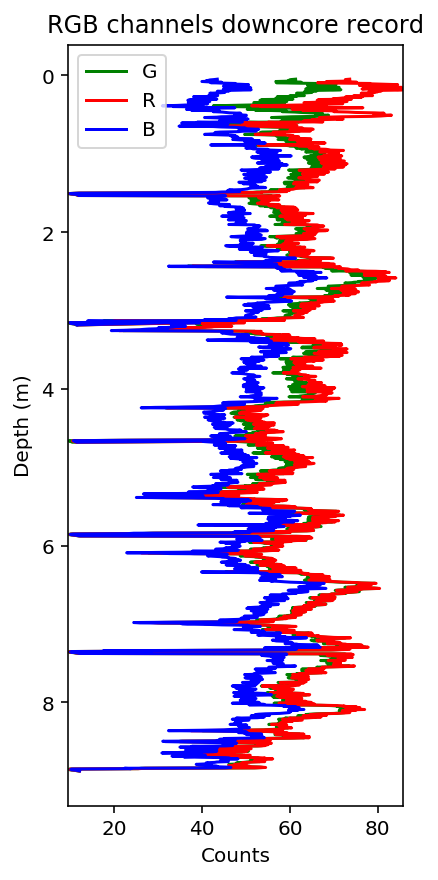

In [143]:
fig, ax =plt.subplots(figsize=(3,7))

refl.plot(y='depth', x ='G', ax=ax, label='G', c='green')
refl.plot(y='depth', x ='R', ax=ax, label='R', c='red')
refl.plot(y='depth', x ='B', ax=ax, label='B', c='blue')

ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Counts')
ax.set_title('RGB channels downcore record')

In [144]:
# Gamma ray (natural)
gamma1 = pd.read_csv("../Final_Project/DATA/Natural_Gamma_Radiation.csv")
gamma = gamma1.rename(columns={"NGR total counts (cps)": "ngrT", 
                               "Depth CCSF-361-U1474-ABDEF-20160220 (m)": "depth"})
gamma.head(2)

,Exp,Site,Hole,Core,Type,Sect,Offset (cm),Depth CSF-A (m),depth,ngrT,Error (cps),Relative Error,Timestamp (UTC),Instrument,Text ID,Test No.,Comments
0,361,U1474,F,1,H,1,10.0,0.1,0.1,24.250,0.541,0.022,2016-02-16 09:43:32,NGR System,SECT7637991,95459301,NaN
1,361,U1474,F,1,H,1,20.0,0.2,0.2,25.398,0.315,0.012,2016-02-16 09:43:32,NGR System,SECT7637991,95459301,NaN


### Data summary

* __LR04__

This is the global oxygen isotope stack which was used to tune my own benthic record and create the age vs depth model. 
 
* __Benthic oxygen isotopes__
 
Oxygen isotope measured on *Cibicidoides Wuellerstorfi* and *Uvigerina Peregrina* for use calculating ages of core samples
    
* __Magnetic susceptibility__

* __RGB channels__

* __Natural Gamma Ray__

### Create function for age conversion

All the data I collected or downloaded from the IODP are given in terms of depth. Having the data in terms of the depth scale does not allow for the data to be considered in the context of other climate events or other records. I have created an age model for my data by tuning the benthic oxygen isotope record to the global LR04 record. This allows me to calculate the ages at various depth. 

In [145]:
# import the age-depth model

tie_points = pd.read_csv("../Final_Project/DATA/tie_points_1474",
                         delimiter=" ", header=None, 
                         names=["depth", "age"])
tie_points

,depth,age
0,0.12,9
1,0.49,18
2,3.67,109
3,4.04,126
4,4.65,138
5,5.39,155


In [146]:
# first function I tried, it gives ages in kyr
def age_kyr_function(D):
    age = (28.438*D) + 5.4787
    return age
print(age_kyr_function(0.12))
print(age_kyr_function(4.65))

8.891259999999999
137.71540000000002


I defined the funtion by doing a fit through the age-depth model (in excel) and using that equation to convert depth to age. However, as shown above, the function underestimates the ages  by about 0.2 kyr. It also does not account for periods of lower/ increased sedimentation rates. I decided to use SciPy interpolate to create a better function

In [147]:
#Function
depth_to_age = interpolate.interp1d(tie_points.depth, tie_points.age, 
                                   kind='linear', bounds_error=False, 
                                   fill_value='extrapolate')

In [148]:
#benthic_ages = depth_to_age(benthics)

In [149]:
ages=[]

for a in benthics['ccsf_a']:
    age = depth_to_age(a)
    ages.append(age)
    
benthics['ages']= ages
benthics_new = benthics.astype({'ages': 'float64'})

In [150]:
benthics_new2 = benthics_new.drop_duplicates(subset = "avgs", keep="first")

(0, 160)

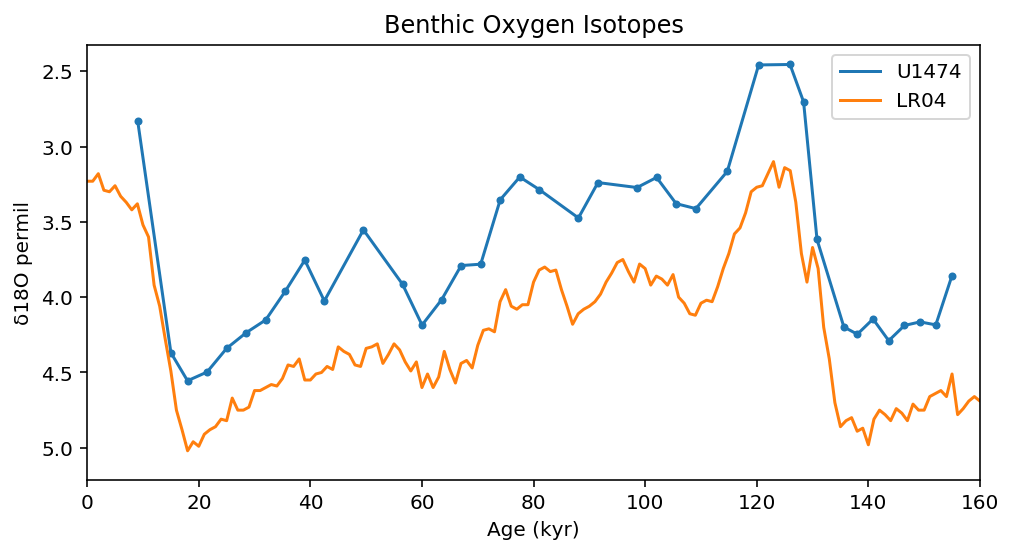

In [151]:
fig, ax =plt.subplots(figsize=(8,4))

benthics_new2.plot(x='ages', y ='d18O', ax=ax, marker='.', label ='U1474')
lr4.plot(x='Time', y = 'd18O', ax=ax, label='LR04' )

ax.invert_yaxis()
ax.set_title('Benthic Oxygen Isotopes')
ax.set_ylabel('δ18O permil')
ax.set_xlabel('Age (kyr)')
ax.set_xlim(0, 160)

### All data with age scale


In [152]:
# k-ar

ages=[]

for a in k_ar['CCSFA']:
    age = depth_to_age(a)
    ages.append(age)
    
k_ar['ages']= ages
k_ar_new = k_ar.astype({'ages': 'float64'})


In [153]:
# Magnetic Susceptibility

ages = []

for a in msl['depth']:
    age = depth_to_age(a)
    ages.append(age)
    
msl['ages']= ages
msl_new = msl.astype({'ages': 'float64'})

#msl_new.dtypes

In [154]:
# Reflectance and colorimetry

ages = []

for a in refl['depth']:
    age = depth_to_age(a)
    ages.append(age)
    
refl['ages']= ages
refl_new = refl.astype({'ages': 'float64'})

#refl_new.dtypes

In [155]:
# Natural Gamma Ray

ages = []

for a in gamma['depth']:
    age = depth_to_age(a)
    ages.append(age)
    
gamma['ages']= ages
gamma_new = gamma.astype({'ages': 'float64'})

#gamma_new.dtypes

### PLOTS


Text(0.5, 0, 'Depth (m)')

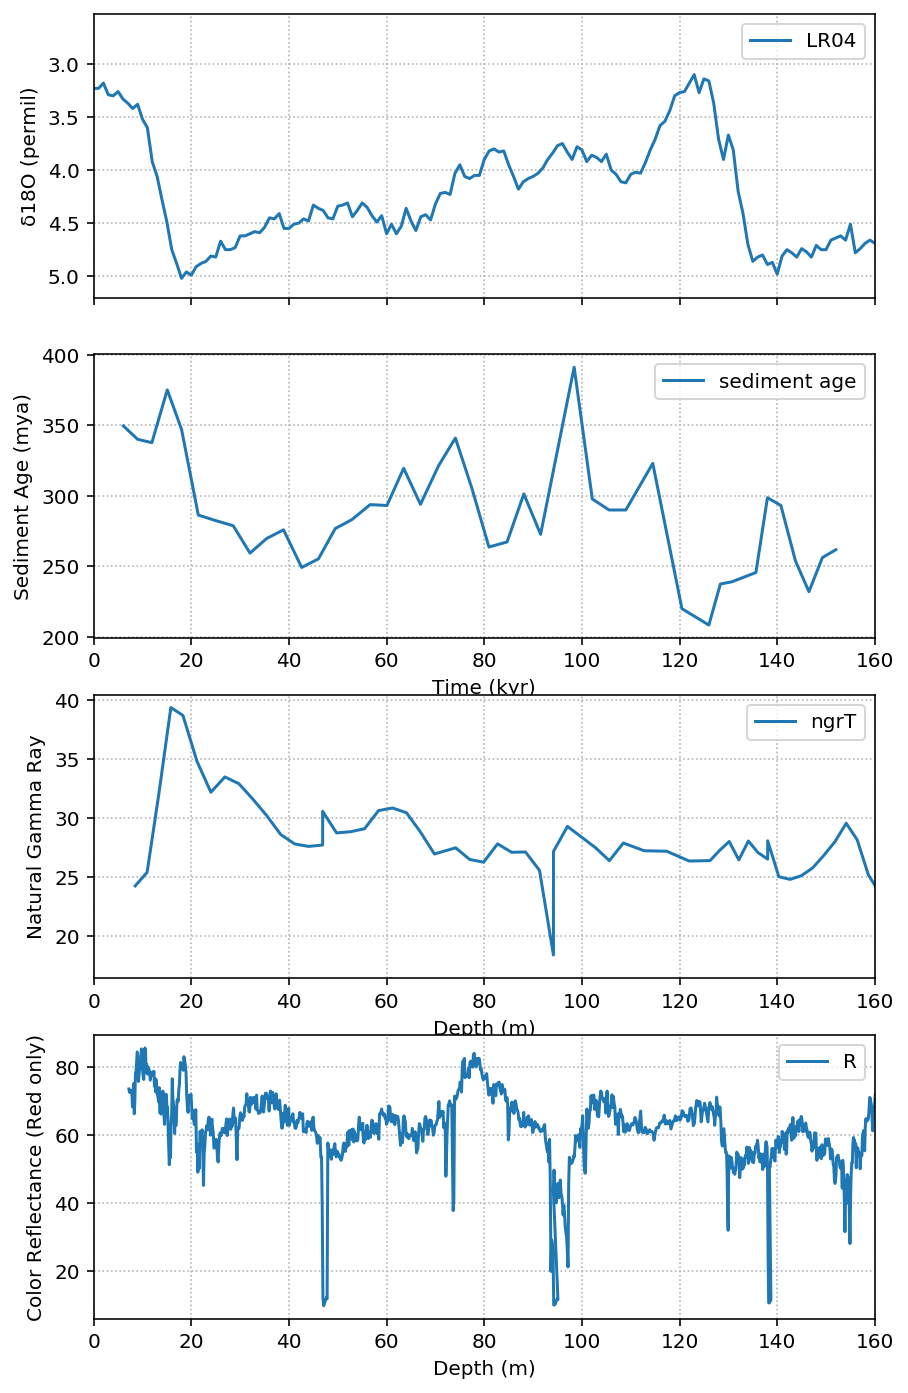

In [156]:
#All plots together

fig, ax =plt.subplots(figsize=(7,12), nrows=4)

lr4.plot(x ='Time', y ='d18O', ax=ax[0], label = 'LR04')

ax[0].set_xlim(0, 160)
ax[0].invert_yaxis()
ax[0].grid(True, which='major', linestyle='dotted')
#ax[0].set_ylim(5.5, 2)
ax[0].set_ylabel('δ18O (permil)')
ax[0].set_xticklabels([])
ax[0].set_xlabel(' ')

#My data
k_ar_new.plot(x ='ages', y='Avg_age', ax=ax[1], label = 'sediment age')

ax[1].set_xlim(0, 160)
#ax[1].invert_yaxis()
ax[1].grid(True, which='major', linestyle='dotted')
ax[1].set_ylabel('Sediment Age (mya)')
ax[1].set_xlabel('Time (kyr)')

gamma_new.plot(x ='ages', y='ngrT', ax=ax[2])

ax[2].set_xlim(0, 160)
#ax[2].invert_yaxis()
ax[2].grid(True, which='major', linestyle='dotted')
ax[2].set_ylabel('Natural Gamma Ray')
ax[2].set_xlabel('Depth (m)')

refl_new.plot(x='ages', y='R', ax=ax[3])

ax[3].set_xlim(0, 160)
#ax[3].invert_yaxis()
ax[3].grid(True, which='major', linestyle='dotted')
ax[3].set_ylabel('Color Reflectance (Red only)')
ax[3].set_xlabel('Depth (m)')
                 
#plt.tight_layout()

Colors are related to the mineral makeup of the terrigenous sediment. Therefore, these variations may be showing changes in terrigenous sediment. There may be a regular periodicity in these changes that signifies that rainfall varies more with precession

### More graphs

Text(0.5, 0, 'Age (kyr)')

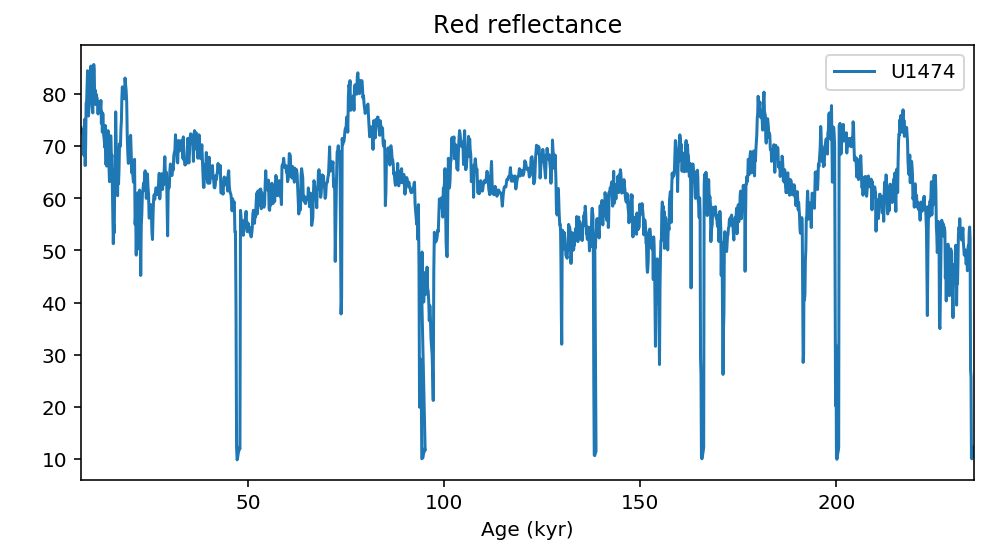

In [159]:
fig, ax =plt.subplots(figsize=(8,4))

refl_new.plot(x='ages', y ='R', ax=ax, label ='U1474')

#ax.invert_yaxis()
ax.set_title('Red reflectance')
ax.set_ylabel(' ')
ax.set_xlabel('Age (kyr)')
#ax.set_xlim(0, 160)

In [ ]:
refl_new.plot(x='ages', y='R', ax=ax[3])

ax[3].set_xlim(0, 160)
#ax[3].invert_yaxis()
ax[3].grid(True, which='major', linestyle='dotted')
ax[3].set_ylabel('Color Reflectance (Red only)')
ax[3].set_xlabel('Depth (m)')

### Conclusions